 # GROUP 1 PHASE 4 PROJECT
 

### GRANDWILL REALTY SOLUTIONS

### ZILLOW TIME SERIES ANALYSIS 

# Group Members:
* Thenya Thuita
* Vivian Mosomi
* Mark Njagi
* Mary Mwangi

## SUMMARY FOR TIME SERIES ANALYSIS

### 1. BUSINESS UNDERSTANDING
Real estate encompasses the land, plus any permanent man-made additions, such as houses and other buildings. Real estate investment entails the strategic allocation of capital into properties with the aim of generating income or capital appreciation.

In this time series forecasting project we're using data from Zillow Research, a trusted source for real estate information, to predict future property prices. With advanced techniques, we're helping **Grand Realty investment** firm find the best zip codes to invest in.

Our aim as consultants is to find valuable information, that  will help us identify great places to invest in real estate and understand how the market works, including risks and expected returns. Our goal is to give our stakeholders the knowledge and resources to make smart decisions in the changing world of real estate investment.


### 2. DATA UNDERSTANDING

This data represents monthly housing sales prices for zip codes over the period of April 1996 to April 2018 as reported by Zillow.

Before conversion each row represents a unique home and its location(RegionName later renamed,ZipCode),Metro,city, State and CountyName and value(later renamed,Price).


- RegionID: Unique index, 58196 through 753844
- RegionName: Unique Zip Code, 1001 through 99901
- City: City in which the zip code is located
- State: State in which the zip code is located
- Metro: Metropolitan Area in which the zip code is located
- CountyName: County in which the zip code is located
- SizeRank: Numerical rank of size of zip code, ranked 1 through 14723
- 1996-04 through 2018-04: refers to the median housing sales values for April 1996 through April 2018, that is 265 data points of monthly data for each zip code
- Value: refers to the median housing price


### 3. DATA PREPARATION

We took the following data preparation steps

i. Dropping columns before 2008
The data starts from the year 1996 to 2018. These are 22 years. We decided we will consider data from 2008 to 2018 for the following reason:
 - Relevance to current trends - Data before 2008 is less relevant to the current analysis due to significant changes in the underlying real estate market conditions. For example, the global financial crisis of 2008 resulted in substantial economic and financial changes worldwide, which may have rendered pre-crisis data less applicable to the post-crisis trends .

ii. Renaming Columns
The zipcodes we needed are in the column 'RegionName'. For efficiency in working with the data, we renamed the RegionName to ZipCodes

iii. Filling in missing values - The following columns had missing values;
- Price - The price column is numeric and since it has missing values, we replaces the ones missing with 0.
- Metro - Which represents the metropolitan area, is a categorical column and therefore, could not fill missing values numerically. So we used the word 'unknown', to replace missing values.

iv. Converting data to Long Format - Data was in wide format, which is difficult to work with. So we performed melting to convert to long format so what we can have efficient rows and columns.

For time series specific pre-processing steps:
i. Removing trends - We used the **dickey** fuller test to check for stationarity and used **Differencing to remove trends** so as to make the data stationary


### 4. MODELLING
Our modelling approach involved plotting the pacf and the acf so as to know the number of lags and the order(p,d,q) to use when using the ARIMA and SARIMAX models

We used the following models:

i. ARIMA - This was our baseline model

ii. Facebook Prophet 

iii. SARIMAX Model

### 5. MAIN OBJECTIVE
To develop a time series model predicting the top five zip codes for real estate investment.

*Specific Objectives*
- To evaluate which county exhibits the most promising real estate investment opportunities.
- To understand the trend for the 5 best Zipcodes to invest in based on Return On Investment(ROI).
- To forecast property values over the short and long term, aiming to identify the most favourable zip codes for investment across various counties.

### 4. METRICS OF SUCCESS

1. Return On Investment - Used to evaluate how well an investment has performed by measuring the profitability and quantifying the benefit gained over a period of time. 
For this model, it is used to forecast which top 5 zip codes would have the best ROI so that the consultants can invest in them

2. Root Mean Squared Error - Measures the average magnitude of the errors between the actual and predicted values

### 6. LIBRARIES USED AND WHY WE USED THEM
- pandas - For data manipulation.
- numpy - For numerical operations such as square root. For example, to find RMSE, we find square root of MSE
- matplotlib and seaborn - For visualization
- scikit-learn - We've used this for tools such as train test split and perfomance metrics like mse and rmse.
- statsmodels - For time series operations such as plotting acf, pacf and time series models 
- warnings - Efficient for filtering out warnings

### Importing Libraries Needed

In [73]:
# Importing Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pmdarima as pm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error as MSE
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAXResults
from statsmodels.tsa.arima.model import ARIMA
import joblib 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.style.use('ggplot')

In [74]:
#loading the data

df = pd.read_csv("zillow_data.csv")
df.sample(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6903,94979,85546,Safford,AZ,Safford,Graham,6904,61700.0,61900.0,62200.0,...,138700,139200,139400,139900,140600,141400,142400,141500,139000,137500
2963,97416,93705,Fresno,CA,Fresno,Fresno,2964,72300.0,72100.0,71900.0,...,167600,170500,173000,174000,174300,175300,177300,179200,181000,182200
1416,77984,46140,Greenfield,IN,Indianapolis,Hancock,1417,118600.0,118300.0,117700.0,...,142100,144100,146500,148000,148800,149900,150800,151400,151800,152400
381,97748,94541,Hayward,CA,San Francisco,Alameda,382,161300.0,161100.0,160900.0,...,577400,582800,588800,596700,605600,616200,625400,633600,641400,644900
3974,74278,37303,Athens,TN,Athens,McMinn,3975,52700.0,53300.0,53800.0,...,112800,113200,114000,114700,115200,115800,116400,117200,118200,118800


As we can see above our data is in wide format.At some point we will change it to long format

In [75]:
# Investigating data type of each column

df.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object

In [76]:
# Dropping years before 2008 as we stated the reason in the summary part 

df.drop(columns = df.columns[7:148], inplace=True)

In [77]:
# Changing RegionName column to Zipcodes

df.rename(columns = {'RegionName': 'ZipCodes'}, inplace=True)

#### Calculating Return on Investment

In [78]:
""" 
We've used the following formula:
ROI = Net Profit / Initial Cost of Investment
Net Profit - Years between 2018 and 2008
Initial investiment - In the year 2008
"""

" \nWe've used the following formula:\nROI = Net Profit / Initial Cost of Investment\nNet Profit - Years between 2018 and 2008\nInitial investiment - In the year 2008\n"

In [79]:
#Calculating the ROI(Return of Investment) for the last 10 years and the last 5 years

df['10_year_ROI(%)'] = round(((df['2018-04']-df['2008-01'])/df['2008-01'])*100,2)
df['5_year_ROI(%)'] = round(((df['2018-04']-df['2013-01'])/df['2013-01'])*100,2)

In [80]:
# Printing out df to see the new columns
df

,RegionID,ZipCodes,City,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,10_year_ROI(%),5_year_ROI(%)
0,84654,60657,Chicago,IL,Chicago,Cook,1,881700.0,875900.0,870300.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,16.89,28.46
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,213900.0,213500.0,212600.0,...,312500,314100,315000,316600,318100,319600,321100,321800,50.44,56.29
2,91982,77494,Katy,TX,Houston,Harris,3,254100.0,252700.0,251100.0,...,320200,320400,320800,321200,321200,323000,326900,329900,29.83,28.42
3,84616,60614,Chicago,IL,Chicago,Cook,4,1163000.0,1157000.0,1150800.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,12.38,29.88
4,93144,79936,El Paso,TX,El Paso,El Paso,5,131200.0,130300.0,129300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,-7.39,7.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,197300.0,197900.0,198100.0,...,218600,218500,218100,216400,213100,209800,209200,209300,6.08,21.83
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,229000.0,228400.0,227700.0,...,212200,215200,214300,213100,213700,218300,222700,225800,-1.40,30.14
14720,75672,40404,Berea,KY,Richmond,Madison,14721,104400.0,103600.0,103100.0,...,124600,126700,128800,130600,131700,132500,133000,133400,27.78,35.02
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,641200.0,640800.0,640100.0,...,682400,695600,695500,694700,706400,705300,681500,664400,3.62,28.71


In [81]:
# Function to get the highest and lowest zip codes/ROI

def get_zip_ROI(dataframe):
    first_5_ROIs_10yrs = dataframe.sort_values('10_year_ROI(%)',ascending=False)[['ZipCodes', '10_year_ROI(%)']][:5]
    last_5_ROIs_10yrs = dataframe.sort_values('10_year_ROI(%)',ascending=True)[['ZipCodes','10_year_ROI(%)']][:5]

    first_5_ROIs_5yrs = dataframe.sort_values('10_year_ROI(%)',ascending=True)[['ZipCodes','5_year_ROI(%)']][:5]
    last_5_ROIs_5_yrs = dataframe.sort_values('10_year_ROI(%)',ascending=True)[['ZipCodes','5_year_ROI(%)']][:5]


    return first_5_ROIs_10yrs, last_5_ROIs_10yrs, first_5_ROIs_5yrs, last_5_ROIs_5_yrs

In [82]:
# Calling the ROI function ,passing in the zipcodes as parameters and assigning the values to variables

first_5_ROIs_10yrs, last_5_ROIs_10yrs, first_5_ROIs_5yrs, last_5_ROIs_5yrs = get_zip_ROI(df)

print(f"10 years Top 5 ROIs: {first_5_ROIs_10yrs}")

print('\n')

print(f"10 years Bottom 5 ROIs: {last_5_ROIs_10yrs}")

print('\n')

print(f"5 years Top 5 ROIs: {first_5_ROIs_5yrs}")

print('\n')

print(f"5 years Bottom 5 ROIS: {last_5_ROIs_5yrs}")



10 years Top 5 ROIs:        ZipCodes  10_year_ROI(%)
6563      15201          176.01
2452      58801          166.82
1155      11222          160.02
11167     58318          157.32
2580      94043          153.97


10 years Bottom 5 ROIs:       ZipCodes  10_year_ROI(%)
5278      8611          -56.98
4381     48503          -55.64
4149     48506          -54.74
2417      8618          -47.41
3894     70805          -45.79


5 years Top 5 ROIs:       ZipCodes  5_year_ROI(%)
5278      8611          20.47
4381     48503          35.71
4149     48506          20.79
2417      8618          14.71
3894     70805           0.71


5 years Bottom 5 ROIS:       ZipCodes  5_year_ROI(%)
5278      8611          20.47
4381     48503          35.71
4149     48506          20.79
2417      8618          14.71
3894     70805           0.71


Plotting the top 5 and bottom 5 zip codes for the last 10 years

<Figure size 432x288 with 0 Axes>

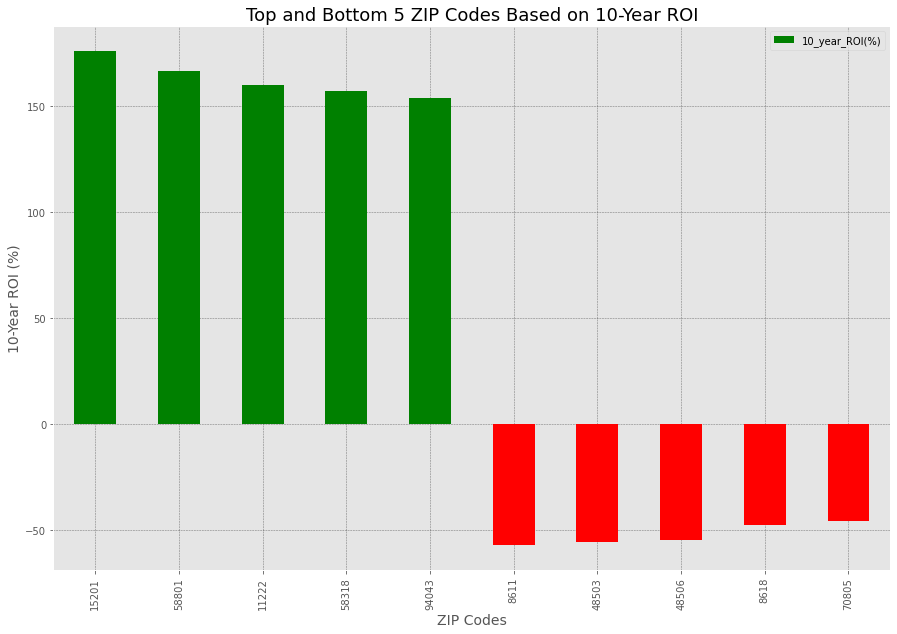

In [83]:
# Combine the first and last 5 ROIs
selected_ROIs_10yrs = first_5_ROIs_10yrs.append(last_5_ROIs_10yrs)

# Create a bar graph
plt.figure()
selected_ROIs_10yrs.plot(x = 'ZipCodes', y = '10_year_ROI(%)', kind='bar', figsize=(15,10), color=['green' if roi in first_5_ROIs_10yrs.values else 'red' for roi in selected_ROIs_10yrs.values])

# Add dark grid background
plt.grid(color='black', linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Top and Bottom 5 ZIP Codes Based on 10-Year ROI',fontsize=18)
plt.xlabel('ZIP Codes',fontsize=14)
plt.ylabel('10-Year ROI (%)',fontsize=14)
plt.show()


Plotting the top 5 and bottom 5 zip codes for the last 5 years

In [84]:
def get_zip_ROI(dataframe):
    first_5_ROIs = dataframe.sort_values('5_year_ROI(%)',ascending=False)[['ZipCodes', '5_year_ROI(%)']][:5]
    last_5_ROIs = dataframe.sort_values('5_year_ROI(%)',ascending=True)[['ZipCodes', '5_year_ROI(%)']][:5]

    return first_5_ROIs, last_5_ROIs

In [85]:
first_5_ROIs_5yrs, last_5_ROIs_5yrs = get_zip_ROI(df)

print("Top 5 ROIs:")
print(first_5_ROIs_5yrs)

print('\n')
print("\nBottom 5 ROIs:")
print(last_5_ROIs_5yrs)

Top 5 ROIs:
      ZipCodes  5_year_ROI(%)
1477     94601         192.57
7302     80216         191.18
1239     94590         178.39
2627     33460         177.84
2661     33705         172.77



Bottom 5 ROIs:
       ZipCodes  5_year_ROI(%)
12436     45390         -29.15
14300     67578         -26.88
7435      27944         -26.72
5690      27801         -24.66
6881      36078         -24.08


<Figure size 432x288 with 0 Axes>

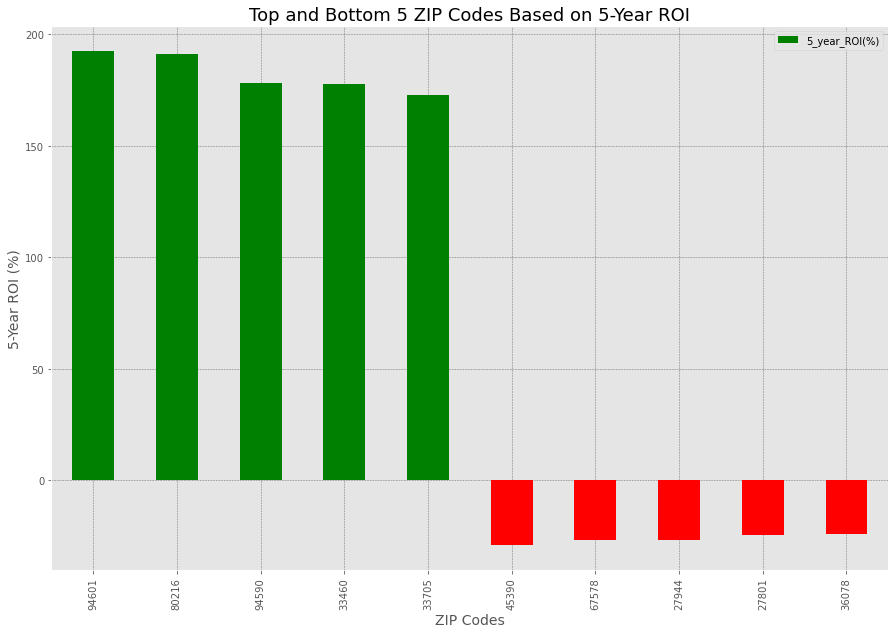

In [86]:
# Visualize the ROIs

selected_ROIs_5yrs = first_5_ROIs_5yrs.append(last_5_ROIs_5yrs)

# Bar graph for the top 5 zip codes
plt.figure()
selected_ROIs_5yrs.plot(x='ZipCodes', y='5_year_ROI(%)', figsize=(15,10), kind='bar', color=['green' if roi in first_5_ROIs_10yrs.values else 'red' for roi in selected_ROIs_10yrs.values])

# Add dark grid background
plt.grid(color='black', linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Top and Bottom 5 ZIP Codes Based on 5-Year ROI', fontsize=18)
plt.xlabel('ZIP Codes', fontsize=14)
plt.ylabel('5-Year ROI (%)', fontsize=14)
plt.show()


In [87]:
#Conversion to str
df['10_year_ROI(%)'] = df['10_year_ROI(%)'].astype('str')

Using a function to reshape data to long format

In [88]:
#Melting data 
def reshape_data_to_long_format(dataframe):
    # Melting the df to long format
    melted_df = pd.melt(
        dataframe,
        id_vars=['ZipCodes', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'],
        var_name='Date',
        value_name='Price'
    )
    
    # Filter out rows with invalid 'Date' values (e.g., '10_year_ROI', '5_year_ROI')
    invalid_date_conditions = melted_df['Date'].str.contains('10_year_ROI|5_year_ROI')
    melted_df = melted_df[~invalid_date_conditions]

    # Convert the 'Date' column to datetime format
    melted_df['Date'] = pd.to_datetime(melted_df['Date'], infer_datetime_format=True)
    
    # Sort by Date
    melted_df = melted_df.sort_values(by=['Date'])

    return melted_df

In [89]:
# Calling the function

data = reshape_data_to_long_format(df)
data.tail()

,ZipCodes,RegionID,SizeRank,City,State,Metro,CountyName,Date,Price
1815840,22556,67309,4912,Stafford,VA,Washington,Stafford,2018-04-01,332700
1815841,33761,72802,4913,Clearwater,FL,Tampa,Pinellas,2018-04-01,334500
1815842,38242,74730,4914,Paris,TN,Paris,Henry,2018-04-01,90900
1815844,70785,88803,4916,Walker,LA,Baton Rouge,Livingston,2018-04-01,158400
1825651,89155,95851,14723,Mesquite,NV,Las Vegas,Clark,2018-04-01,357200


In [90]:
# Setting the Date column to index

data.set_index('Date', inplace=True)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825652 entries, 2008-01-01 to 2018-04-01
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   ZipCodes    int64 
 1   RegionID    int64 
 2   SizeRank    int64 
 3   City        object
 4   State       object
 5   Metro       object
 6   CountyName  object
 7   Price       object
dtypes: int64(3), object(5)
memory usage: 125.4+ MB


Filling columns with missing values

In [92]:
# Dealing with missing values

data.isna().sum()

ZipCodes           0
RegionID           0
SizeRank           0
City               0
State              0
Metro         129332
CountyName         0
Price          26266
dtype: int64

In [93]:
# Inspecting Metro

data[data['Metro'].isnull()].sample(10)

,ZipCodes,RegionID,SizeRank,City,State,Metro,CountyName,Price
Date,,,,,,,,
2016-02-01,38344,74776,8595,Huntingdon,TN,NaN,Carroll,72700
2009-06-01,59047,83904,6660,Livingston,MT,NaN,Park,178100
2018-02-01,74523,90434,9808,Antlers,OK,NaN,Pushmataha,44700
2013-07-01,67661,87710,12089,Phillipsburg,KS,NaN,Phillips,58700
2008-04-01,32696,72150,7453,Williston,FL,NaN,Levy,135200
2015-09-01,38860,75041,10141,Okolona,MS,NaN,Chickasaw,68100
2014-06-01,47634,78707,13484,Richland,IN,NaN,Spencer,80400
2008-07-01,59858,84226,13694,Philipsburg,MT,NaN,Granite,NaN
2009-03-01,63468,86076,12934,Shelbina,MO,NaN,Shelby,NaN


We can see that some rows of the Metro column are Not A Number, meaning null. 

In [94]:
# Insepcting Price

print(data[data['Price'].isnull()].sample(10))

            ZipCodes  RegionID  SizeRank         City State          Metro  \
Date                                                                         
2009-09-01     28526     70005     13042        Dover    NC       New Bern   
2013-12-01     70431     88587     10454         Bush    LA    New Orleans   
2011-10-01     74857     90561      8747       Norman    OK  Oklahoma City   
2008-02-01     85607     94992      6912      Douglas    AZ   Sierra Vista   
2011-11-01     89512     95940      4224         Reno    NV           Reno   
2011-02-01     43450     76690     12188  Pemberville    OH         Toledo   
2011-09-01     30168     70936      4325      Austell    GA        Atlanta   
2012-12-01     43013     76460     14624     Hartford    OH       Columbus   
2009-10-01     47564     78670     14371       Otwell    IN         Jasper   
2012-09-01      2116     58630      3331       Boston    MA         Boston   

               CountyName Price  
Date                         

There are missing values in Price as seen above

In [95]:
# Filing the missig values in Price with '0'

data['Price'].fillna(value = 0, inplace=True)

In [96]:
# Confirming if there are missing values in price
data.isnull().sum()

ZipCodes           0
RegionID           0
SizeRank           0
City               0
State              0
Metro         129332
CountyName         0
Price              0
dtype: int64

In [97]:
#Filling Metro Nan with Unknown

data['Metro'].fillna('Unknown', inplace=True)

In [98]:
# Confirming if there are missing values in Metro

data.isnull().sum()

ZipCodes      0
RegionID      0
SizeRank      0
City          0
State         0
Metro         0
CountyName    0
Price         0
dtype: int64

Plotting a visual to display the mean price over time

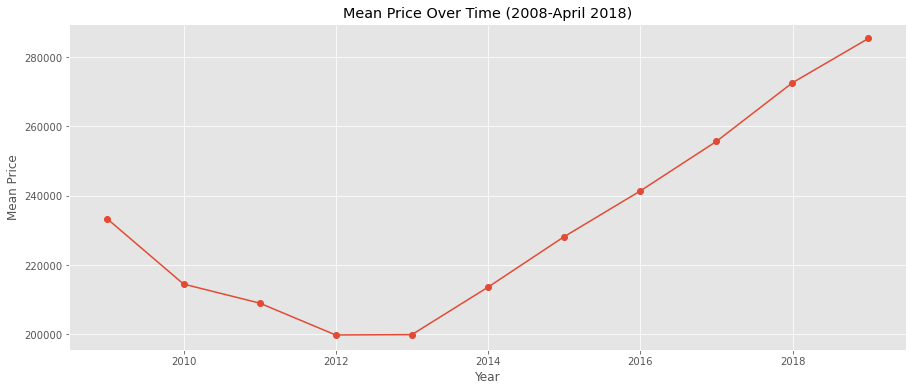

In [99]:
mean_price_by_year = data['Price'].resample('Y').mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(mean_price_by_year.index, mean_price_by_year.values, marker='o', linestyle='-')
plt.title('Mean Price Over Time (2008-April 2018)')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

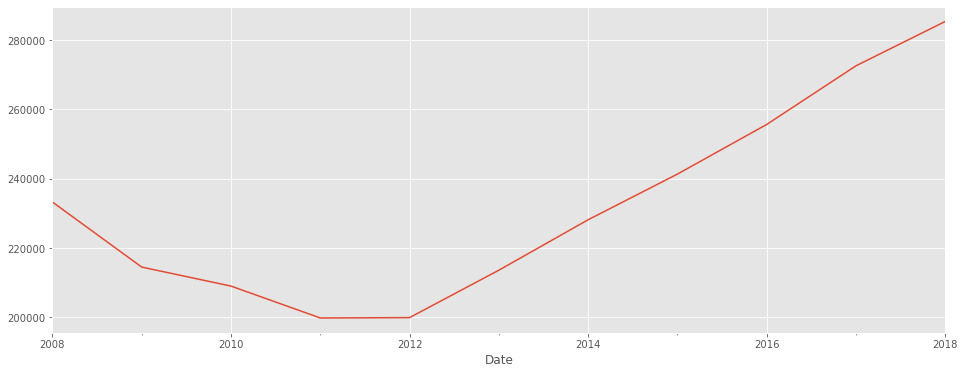

In [100]:
mean_price_by_year.plot(figsize = (16,6));

In [101]:
# Top Five Zipcode Analysis for the past five years (2013 to 2018)

first_5_ROIs_5yrs

,ZipCodes,5_year_ROI(%)
1477,94601,192.57
7302,80216,191.18
1239,94590,178.39
2627,33460,177.84
2661,33705,172.77


In [102]:
""" 
This line of code only selects the price value where the zip code value is among the top 5 ROIs for five years
"""

data = data.loc[data['ZipCodes'].isin(first_5_ROIs_5yrs['ZipCodes'])][['ZipCodes', 'Price']]
data

,ZipCodes,Price
Date,,
2008-01-01,33705,150000.0
2008-01-01,33460,203800.0
2008-01-01,94601,420200.0
2008-01-01,94590,340000.0
2008-01-01,80216,0.0
...,...,...
2018-04-01,33705,177300.0
2018-04-01,33460,215600.0
2018-04-01,94601,566700.0


In [103]:
""" 
This line of code creates a pivot table where the icolumns are zip codes, and each cell contains the price of each zip code
"""

data = data.pivot_table(index = 'Date', columns = 'ZipCodes', values = 'Price')
data

ZipCodes,33460,33705,80216,94590,94601
Date,,,,,
2008-01-01,203800.0,150000.0,0.0,340000.0,420200.0
2008-02-01,199500.0,147700.0,0.0,330200.0,411400.0
2008-03-01,195500.0,145300.0,0.0,317800.0,401400.0
2008-04-01,192000.0,142500.0,0.0,304100.0,390400.0
2008-05-01,188000.0,139600.0,0.0,290800.0,378800.0
...,...,...,...,...,...
2017-12-01,206000.0,167100.0,251200.0,357100.0,535800.0
2018-01-01,209600.0,168200.0,253800.0,362500.0,546900.0
2018-02-01,211600.0,171100.0,258100.0,366900.0,555000.0


Plotting ZipCodes by Price

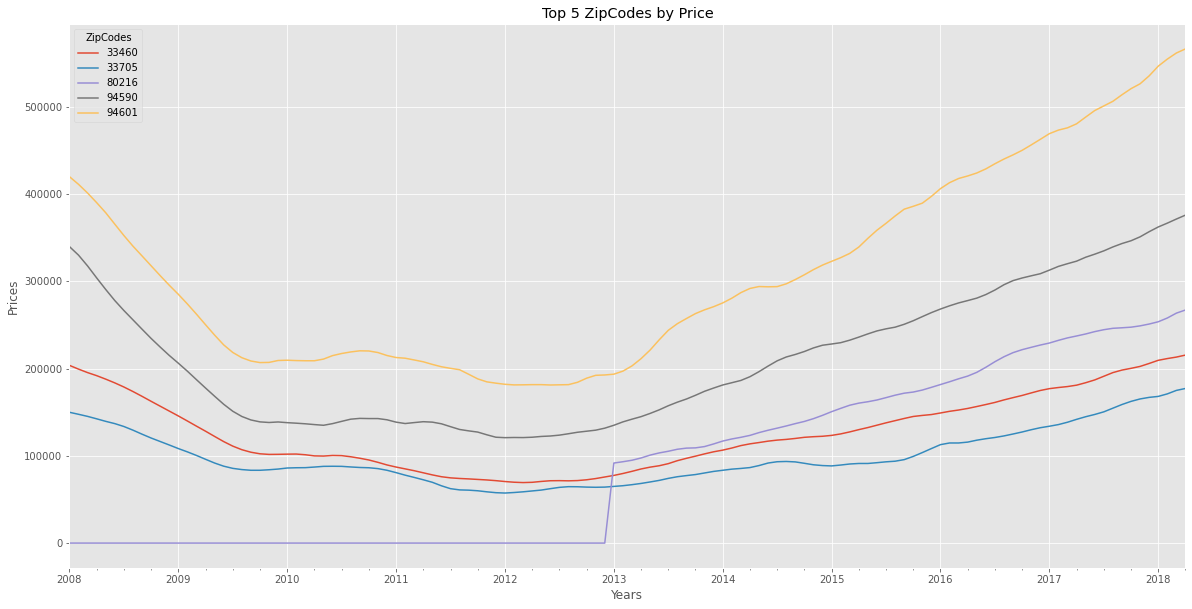

In [104]:
data.plot(figsize = (20,10))
plt.xlabel('Years')
plt.ylabel('Prices')
plt.title('Top 5 ZipCodes by Price')
plt.grid(True);

Generating a Box Plot for top 5 zipcodes

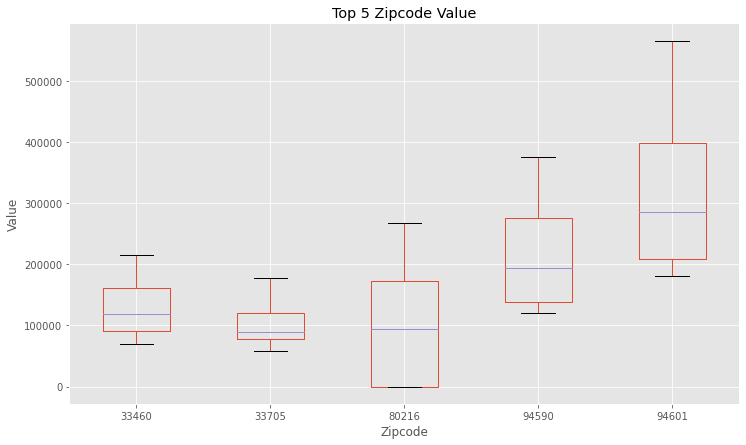

In [105]:
box = data.boxplot(figsize = (12,7,));

box.plot()

# Title
plt.title('Top 5 Zipcode Value')
# xlabel 
plt.xlabel('Zipcode')
# ylabel
plt.ylabel('Value');

 Interpretation: We fail to reject the null hypothesis - the time series is non-stationary.


### Checking for Stationarity

We've created a function to perform dickey fuller test for each zip code to check for stationarity

Null Hypothesis - The time series is not stationary. We're going to use the p-value and the significance level to either reject the null hypothesis or fail to reject the null hypothesis

In [106]:
#Dickey Fuller Test

def adfullertestresults(column_name):
    print ('Results of Dickey-Fuller Test: \n')
    dftest = adfuller(data[column_name])

    # Extract and display test results
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [107]:
adfullertestresults(94590)

Results of Dickey-Fuller Test: 

Test Statistic                  -0.501920
p-value                          0.891641
#Lags Used                       3.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64


For zip code 94590, the p-value is greater than the significance level(0.05), so we **fail to reject the null hypothesis**
Hence , the time series is **not stationary**

In [108]:
adfullertestresults(94601)

Results of Dickey-Fuller Test: 

Test Statistic                  -0.455479
p-value                          0.900416
#Lags Used                       5.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


For zip code 94601, the p-value is greater than the significance level(0.05), so we **fail to reject the null hypothesis**
Hence , the time series is **not stationary**

In [109]:
adfullertestresults(80216)

Results of Dickey-Fuller Test: 

Test Statistic                   0.855678
p-value                          0.992484
#Lags Used                       0.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


For the above zip code we **fail to reject the null hypothesis**. Thus , the time series is **not stationary**

In [110]:
adfullertestresults(33705)

Results of Dickey-Fuller Test: 

Test Statistic                   0.201004
p-value                          0.972318
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


For zip code 33705 ,We also **fail to reject the null hypothesis**. Hence , the time series is **not stationary**

In [111]:
adfullertestresults(33460)

Results of Dickey-Fuller Test: 

Test Statistic                  -1.159221
p-value                          0.690887
#Lags Used                       5.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


For 33460 - **Fail to reject the null hypothesis**. Hence **not statinary**

### Checking for trends, seasonality and residuals using seasonal decompose

In [112]:
# Function to plot decomposition

def plot_seasonal_decomposition(data, zipcode):
   
    # Assuming the DataFrame index needs to be converted to datetime
    data.index = pd.to_datetime(data.index)

    # Perform seasonal decomposition
    result = seasonal_decompose(np.log(data[zipcode]), model='additive')

    # Extract the trend, seasonal, and residual components
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    # Plot the components
    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(data[zipcode], label=f'Zip Code {zipcode}')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

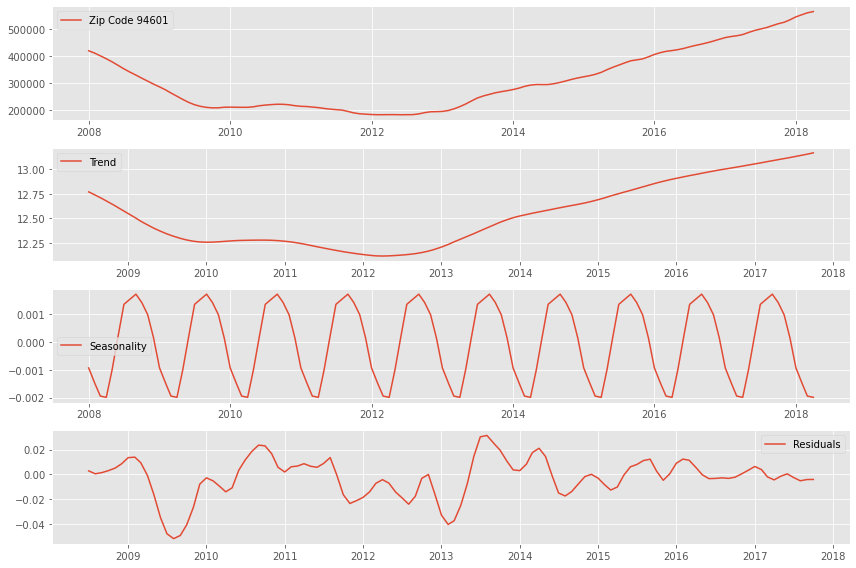

In [113]:
zip_code_to_plot = 94601
plot_seasonal_decomposition(data, zip_code_to_plot)

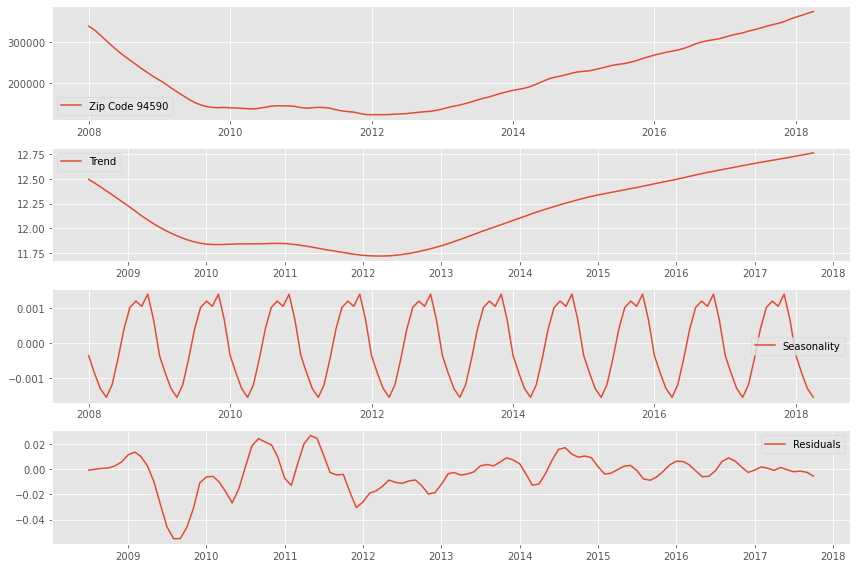

In [114]:
zip_code_to_plot = 94590
plot_seasonal_decomposition(data, zip_code_to_plot)

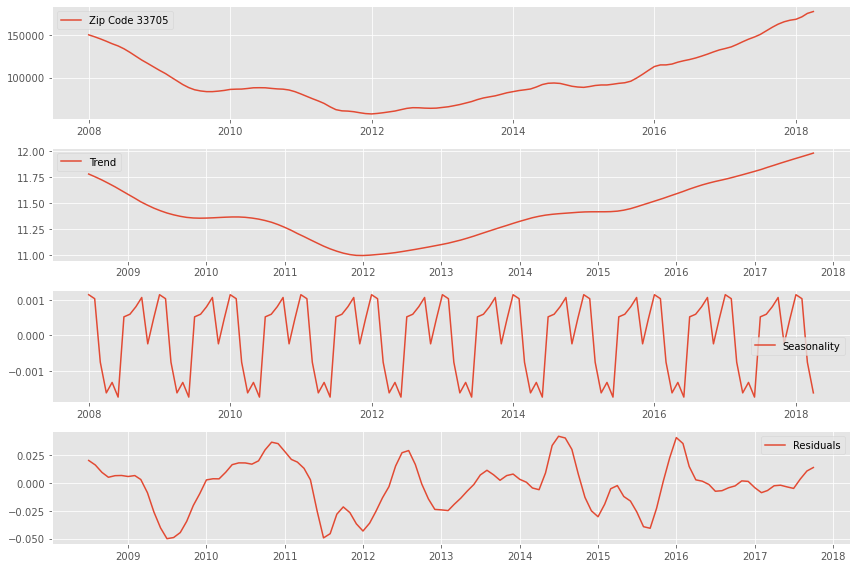

In [115]:
zip_code_to_plot = 33705
plot_seasonal_decomposition(data, zip_code_to_plot)

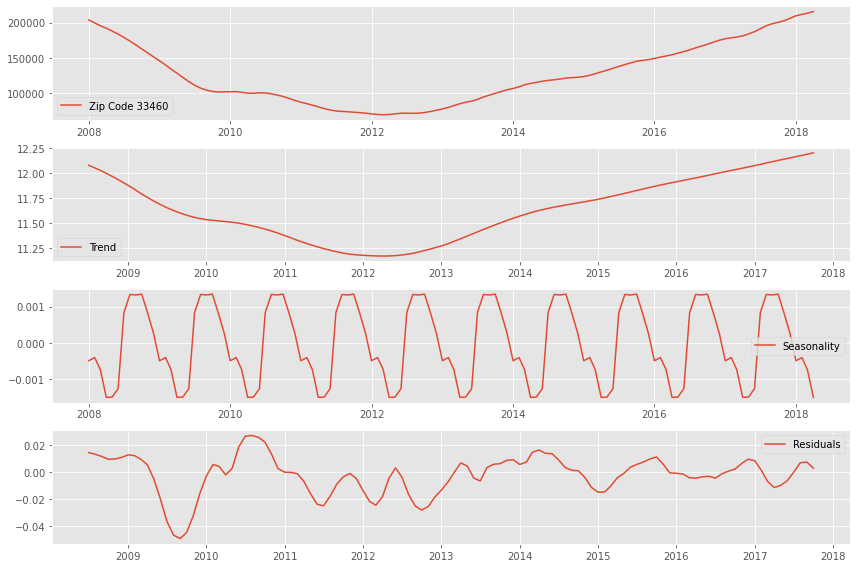

In [116]:
zip_code_to_plot = 33460
plot_seasonal_decomposition(data, zip_code_to_plot)

### Performing Differencing to remove trends from each zip code

In [117]:
# Writing a function to perform differencing

def differencing_function(zipcode, data,periods):
    diff_data = data[zipcode].diff(periods=periods).dropna()  # Drop NaN values introduced by differencing
    
    # Plotting differenced zipcodes
    fig, ax = plt.subplots(figsize=(11, 7))
    ax.plot(diff_data, color='blue', label=f'Zipcode {zipcode}')
    ax.legend(loc='best')
    ax.set_title(f'Zipcode {zipcode} Differenced')
    plt.show(block=False)

    return diff_data

# Function to print results
# ADF Test to check for stationarity
def adfuller_results(differenced_data):
    adf_result = adfuller(differenced_data)
    print("ADF Statistic:", adf_result[0])
    print("p-value:", adf_result[1])
    print("Critical Values:", adf_result[4])

    #Check for stationarity
    if adf_result[1] <= 0.05:
        print("The time series is likely stationary.")
    else:
        print("The time series is likely non-stationary.")

Calling the functions

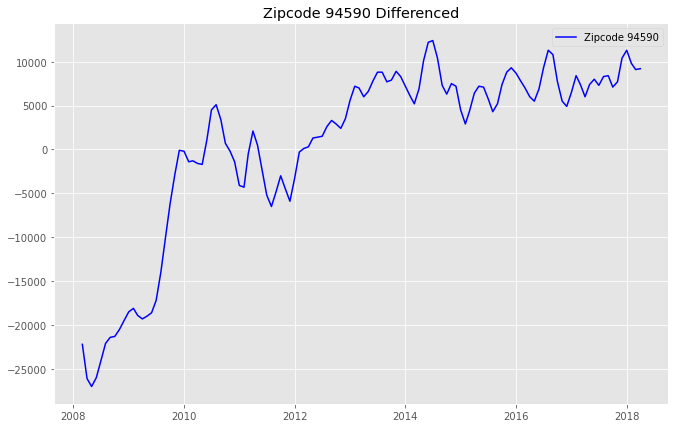

ADF Statistic: -2.9179016434479075
p-value: 0.043305532241847626
Critical Values: {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}
The time series is likely stationary.
None


In [118]:
# Differencing for 94590, we'll use 2 periods

zip_code_to_difference = 94590
differenced_data_94590 = differencing_function(zip_code_to_difference,data,2)

print(adfuller_results(differenced_data_94590))

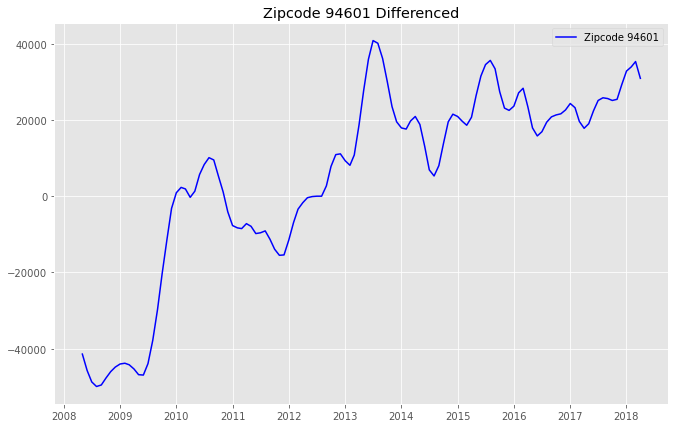

ADF Statistic: -2.898636019267401
p-value: 0.04550683993732019
Critical Values: {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}
The time series is likely stationary.
None


In [119]:
# Differencing for 94601, we'll use 4 periods

zip_code_to_difference = 94601
differenced_data_94601 = differencing_function(zip_code_to_difference,data,4)

# Adfuller results
print(adfuller_results(differenced_data_94601))

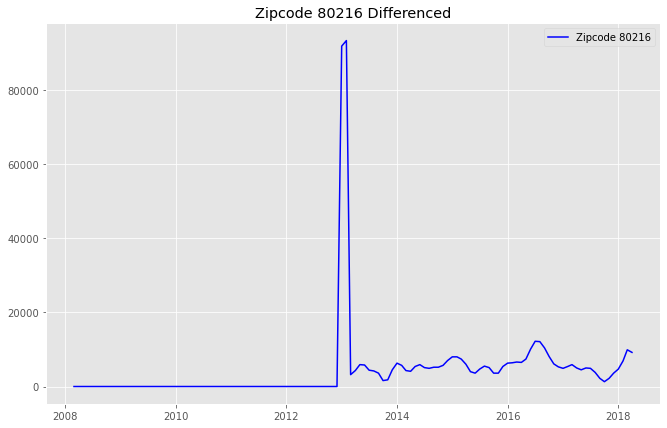

ADF Statistic: -4.0933861117205455
p-value: 0.0009931940007361381
Critical Values: {'1%': -3.4880216384691867, '5%': -2.8867966864160075, '10%': -2.5802408234244947}
The time series is likely stationary.
None


In [120]:
# Differencing for 80216,we'll use 2 periods

zip_code_to_difference = 80216
differenced_data_80216 = differencing_function(zip_code_to_difference,data,2)

# Adfuller results
print(adfuller_results(differenced_data_80216))

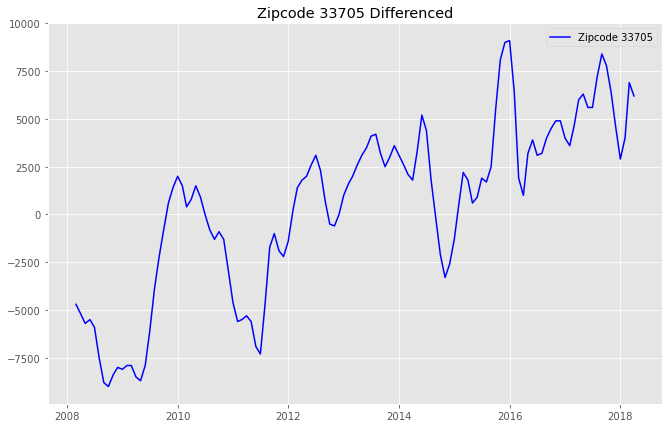

ADF Statistic: -2.1672894973852217
p-value: 0.2183308967768836
Critical Values: {'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}
The time series is likely non-stationary.
None


In [121]:
# Differencing for 33705, we'll use 2 periods

zip_code_to_difference = 33705
differenced_data_33705 = differencing_function(zip_code_to_difference,data,2)

# Adfuller results
print(adfuller_results(differenced_data_33705))

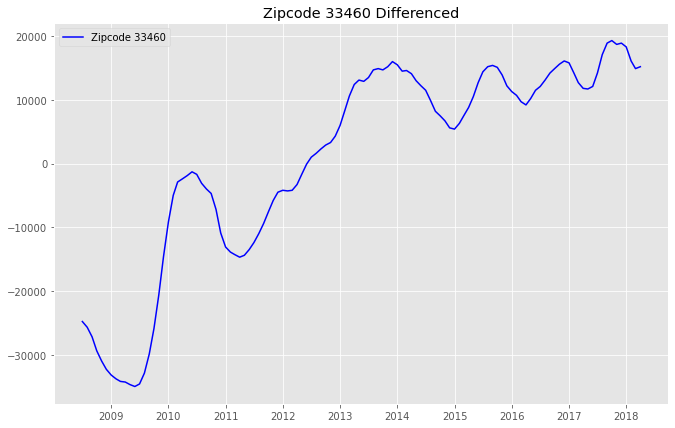

ADF Statistic: -3.0896344669963973
p-value: 0.027329855134247013
Critical Values: {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}
The time series is likely stationary.
None


In [122]:
# Differencing for 33460, we'll use 6 periods

zip_code_to_difference = 33460
differenced_data_33460 = differencing_function(zip_code_to_difference,data,6)

# Adfuller results
print(adfuller_results(differenced_data_33460))

# MODELLING

Plotting the pacf and acf plots of each zip code

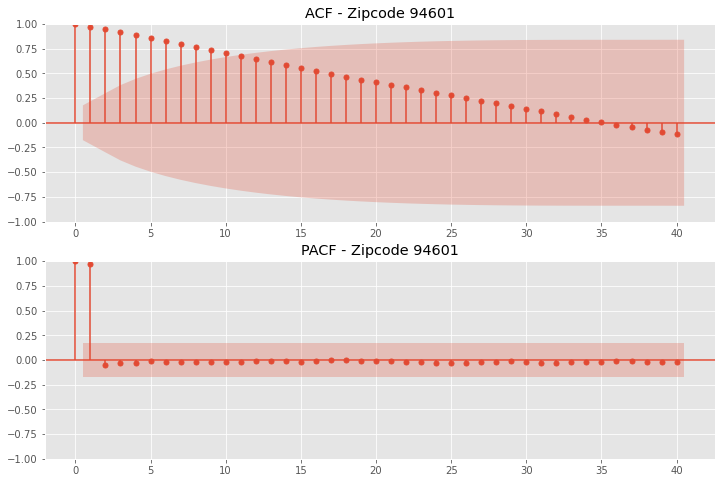

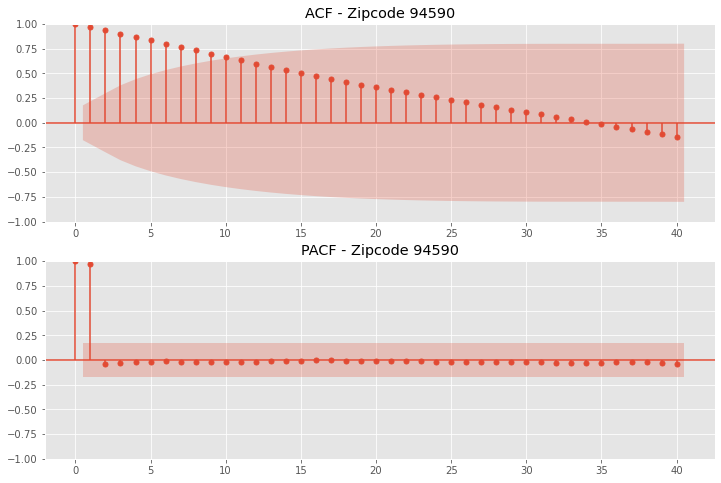

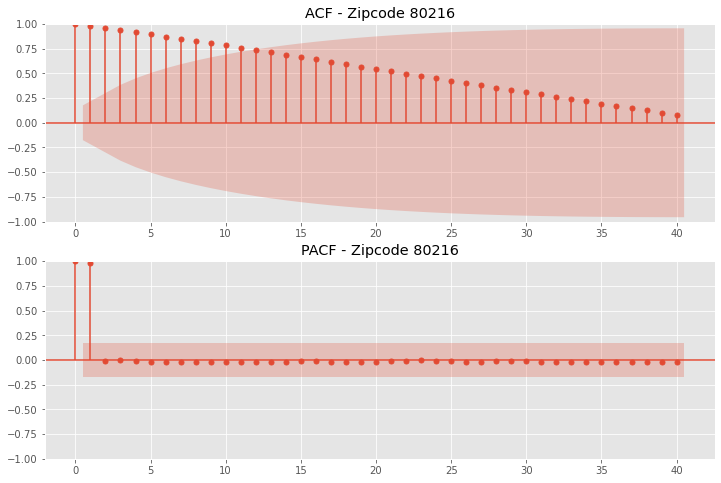

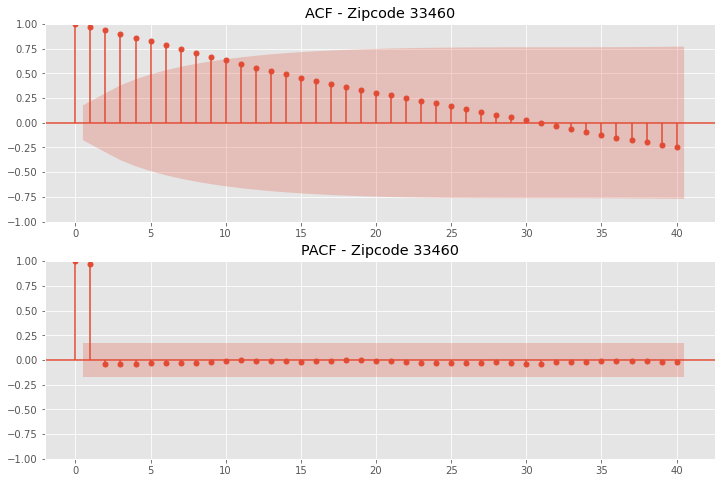

In [123]:
# ZipCodes to plot
#33705 will not be used since differencing did not work for this zipcode

zip_codes_to_plot = [94601,94590,80216,33460] 


# Plot ACF and PACF for each zip code
for zipcode in zip_codes_to_plot:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(data[zipcode], lags=40, ax=ax1, title=f'ACF - Zipcode {zipcode}')
    plot_pacf(data[zipcode], lags=40, ax=ax2, title=f'PACF - Zipcode {zipcode}')
    plt.show()


Performing a train test split. We've used train data from 2008 to 2016 and test data from 2018 onwards

In [124]:
# Define the split year

split_year = '2016-01'

# Split the data into training and testing sets
train = data[:split_year]
test = data[split_year:]

Plotting the train test split

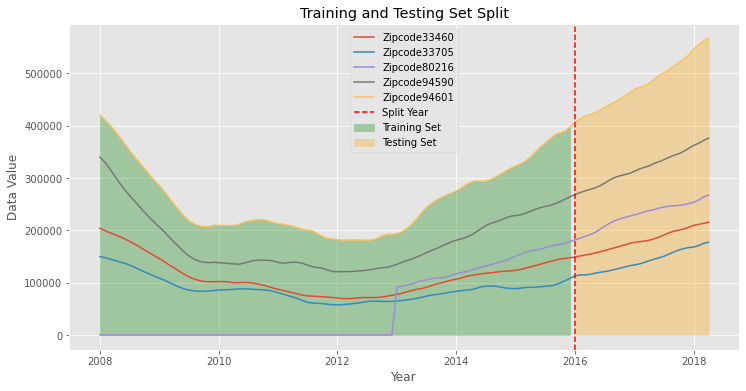

In [125]:
import matplotlib.pyplot as plt

# Plot the entire time series
plt.figure(figsize=(12, 6))
for zipcode in data.columns:
    plt.plot(data.index, data[zipcode], label = f'Zipcode{zipcode}')

# Add a vertical line to indicate the split point
plt.axvline(x=split_year, linestyle='--', color='red', label='Split Year')

# Highlight the training and testing sets
plt.fill_between(data.index, data[94601], where=(data.index < split_year), color='green', alpha=0.3, label='Training Set')
plt.fill_between(data.index, data[94601], where=(data.index >= split_year), color='orange', alpha=0.3, label='Testing Set')

# Customize plot
plt.title('Training and Testing Set Split')
plt.xlabel('Year')
plt.ylabel('Data Value')
plt.legend()
plt.show()


### 1. ARIMA MODEL  - BASELINE

In [126]:
# ARIMA with an order of 2,1,2

endog_column = 94601
arima = ARIMA(data[endog_column], order=(2, 1, 2)).fit()

# predict and get summary
arima_pred = arima.predict(start= '2016-01-01')  
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  94601   No. Observations:                  124
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2285.394
Date:                Sat, 10 Feb 2024   AIC                           4580.787
Time:                        21:51:57   BIC                           4594.848
Sample:                    01-01-2008   HQIC                          4586.499
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0014      0.002      0.818      0.413      -0.002       0.005
ar.L2          0.9986      0.002    620.060      0.000       0.995       1.002
ma.L1         -0.0025      0.007     -0.373      0.709      -0.016       0.011
ma.L2         -0.9975      0.006   -159.772      0.000      -1.010      -0.985
sigma2      1.986e+06   6.36e-09   3.12e+14      0.000    1.99e+06    1.99e+06
===================================================================================
Ljung-Box (L1) (Q):                 113.65   Jarque-Bera (JB):                13.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.80
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.46e+29. Standard errors may be unstable.
"""

We'll use the AIC(Akaike Information Criterion) which gives us the goodness of fit.We have a value fo 4580 which is high.
For the next models, we'll try to reduce that value for better fitting

In [127]:
#RMSE for ARIMA
rmse = np.sqrt(MSE(test[94601],arima_pred))
rmse

6198.915793335476

We have an rmse of 6198 which is also high. We'll work towards reducing this value in the next models

The auto_arima function does a search and returns the best order to use.

### 2. FACEBOOK PROPHET

In [128]:
# Importing FbPhrophet
from fbprophet import Prophet

In [129]:
# Create and fit the Prophet model

prophet_data = data[94601].reset_index().rename(columns={data[94601].reset_index().columns[0]: 'ds', data[94601].reset_index().columns[1]: 'y'})

fb_model = Prophet(changepoint_prior_scale=0.03,seasonality_prior_scale=12.0,)

fb_model.fit(prophet_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [130]:
# Predicting values

future_data = fb_model.make_future_dataframe(periods=0, freq = 'm')
prophet_pred = fb_model.predict(future_data)
test_predictions = prophet_pred['yhat'][-len(test):]

Calculating rmse for the Facebook Prophet

In [131]:
from sklearn.metrics import mean_squared_error as MSE

rmse_prophet= np.sqrt(MSE(test[94601],test_predictions))
rmse_prophet

4545.076833005094

The rmse for the Facebook Prophet is lower than the ARIMA Model but it is still high. It performs better than ARIMA but we're implementing SARIMAX as our 3rd model to see if there will be an improvement.

### 2. SARIMAX

##### AUTO-ARIMA

In [57]:
# Running the auto_arima

auto_model = pm.auto_arima(y=train[94601], start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=12, max_order=None,
                           trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1672.199, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1676.727, Time=0.12 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1679.708, Time=0.06 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1674.024, Time=0.08 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1674.589, Time=0.05 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1676.004, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1674.940, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1677.936, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1679.120, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1672.876, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.623 seconds


From the auto arima function, we've got the best order as (0,2,0) and the seasonal order which we will use for the SARIMAX model.

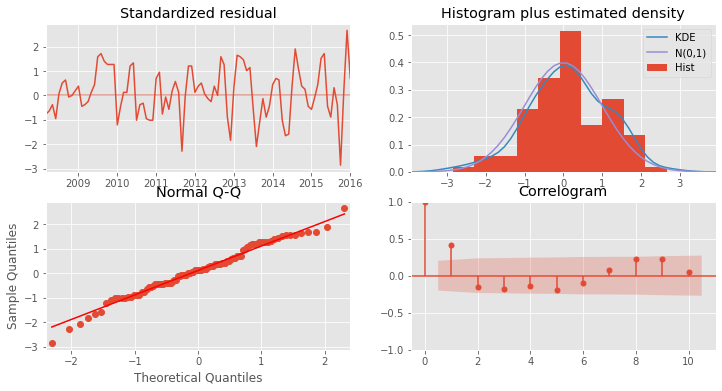

In [58]:
auto_model.plot_diagnostics(figsize=(12,6));

From the plot diagnostics:

Standardized Residuals: A time series plot of the standardized residuals to check for randomness and constant variance.

Histogram plus Kernel Density Estimate (KDE): This plot shows the distribution of the standardized residuals along with a kernel density estimate. It helps to assess whether the residuals are normally distributed.

Normal Q-Q (Quantile-Quantile) Plot: This plot compares the quantiles of the standardized residuals against the quantiles of a normal distribution. Deviations from the diagonal line suggest departures from normality.Our plot shows normality

Correlogram (ACF - AutoCorrelation Function): This plot displays the autocorrelation of the standardized residuals at different lags to identify any remaining autocorrelation.

#### Fitting SARIMAX Model

In [59]:
# Import SARIMAX model from statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(endog=data[94601], order=(0,2,0), seasonal_order=(0, 0, 0, 12),
                enforce_stationarity=True, enforce_invertibility=True,)
results = model.fit(method='powell')
results.summary()

Optimization terminated successfully.
         Current function value: 8.670914
         Iterations: 1
         Function evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  94601   No. Observations:                  124
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1075.193
Date:                Sat, 10 Feb 2024   AIC                           2152.387
Time:                        21:36:50   BIC                           2155.191
Sample:                    01-01-2008   HQIC                          2153.526
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.645e+06    3.6e+05      7.353      0.000    1.94e+06    3.35e+06
===================================================================================
Ljung-Box (L1) (Q):                  16.24   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.00   Prob(JB):                         0.82
Heteroskedasticity (H):               2.04   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the SARIMAX model, the AIC value is 2152 which is a drop from the ARIMA model. Hence our SARIMAX gives a good fit.

In [60]:
# Getting predicted value to use in finding rmse
y_predicted = results.predict(start = '2016-01-01', end = '2018-04-01')
y_predicted

2016-01-01    405400.0
2016-02-01    415400.0
2016-03-01    420100.0
2016-04-01    422900.0
2016-05-01    423900.0
2016-06-01    427800.0
2016-07-01    433800.0
2016-08-01    440900.0
2016-09-01    445800.0
2016-10-01    450000.0
2016-11-01    455600.0
2016-12-01    462800.0
2017-01-01    469400.0
2017-02-01    476000.0
2017-03-01    477700.0
2017-04-01    478800.0
2017-05-01    485400.0
2017-06-01    496200.0
2017-07-01    503500.0
2017-08-01    506600.0
2017-09-01    511900.0
2017-10-01    521600.0
2017-11-01    528100.0
2017-12-01    532300.0
2018-01-01    544900.0
2018-02-01    558000.0
2018-03-01    563100.0
2018-04-01    569000.0
Freq: MS, Name: predicted_mean, dtype: float64

Plotting the predicted values

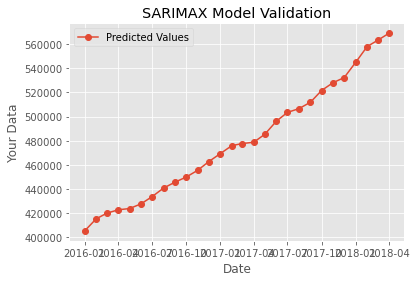

In [62]:
plt.plot(y_predicted.index, y_predicted, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Your Data')
plt.title('SARIMAX Model Validation')
plt.legend()
plt.show()

In [63]:
#Mean squared error

from sklearn.metrics import mean_squared_error as MSE

rmse_sarimax = np.sqrt(MSE(test[94601],y_predicted))
rmse_sarimax

1729.264914019001

Our RMSE score has also reduced, meaning that our SARIMAX model performs well.

In [67]:
# Saving sarimax model results

results.save('sarimax_model.pkl')


In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

# Load the saved SARIMAX model
loaded_model = SARIMAXResults.load('sarimax_model.pkl')
loaded_model


### Forecasting

In [133]:
forecast_periods= 12

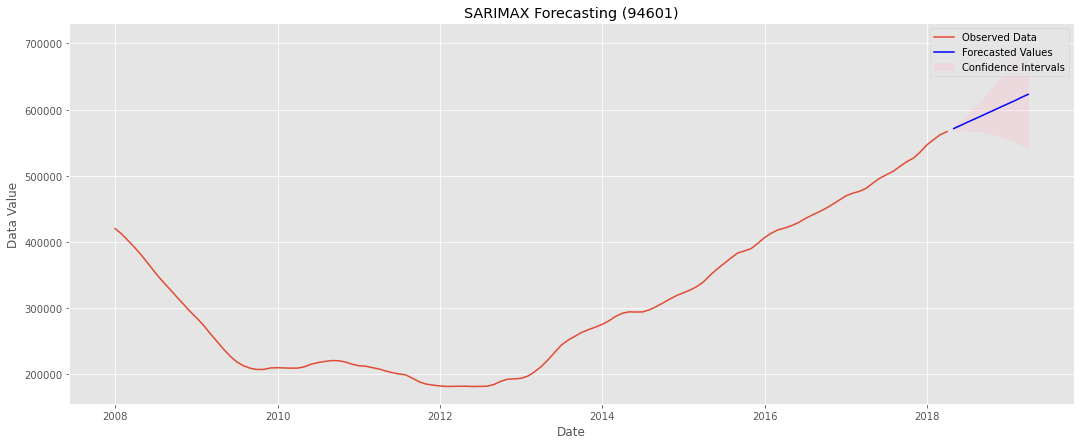

In [134]:
# Get the forecast and confidence intervals
forecast = results.get_forecast(steps=forecast_periods)
forecast_ci = forecast.conf_int()

# Extract forecasted values, lower, and upper confidence intervals
forecast_values = forecast.predicted_mean
lower_ci = forecast_ci.iloc[:, 0]
upper_ci = forecast_ci.iloc[:, 1]

# Plotting
plt.figure(figsize=(18, 7))

# Plot observed data
plt.plot(data.index, data[94601], label='Observed Data')

# Plot forecasted values
plt.plot(forecast_values.index, forecast_values, color='blue', label='Forecasted Values')

# Fill confidence intervals
plt.fill_between(forecast_values.index, lower_ci, upper_ci, color='pink', alpha=0.3, label='Confidence Intervals')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.title('SARIMAX Forecasting (94601)')
plt.legend()
plt.show()


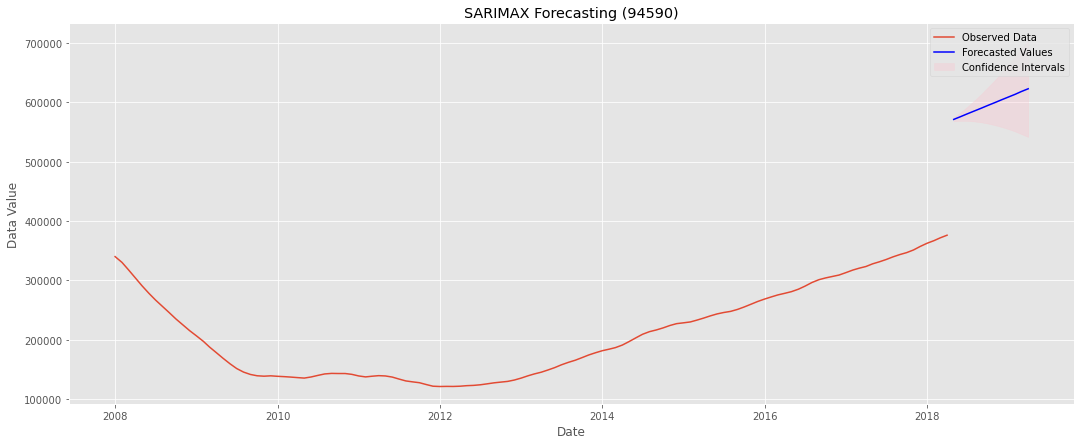

In [135]:
# Get the forecast and confidence intervals
forecast = results.get_forecast(steps=forecast_periods)
forecast_ci = forecast.conf_int()

# Extract forecasted values, lower, and upper confidence intervals
forecast_values = forecast.predicted_mean
lower_ci = forecast_ci.iloc[:, 0]
upper_ci = forecast_ci.iloc[:, 1]

# Plotting
plt.figure(figsize=(18, 7))

# Plot observed data
plt.plot(data.index, data[94590], label='Observed Data')

# Plot forecasted values
plt.plot(forecast_values.index, forecast_values, color='blue', label='Forecasted Values')

# Fill confidence intervals
plt.fill_between(forecast_values.index, lower_ci, upper_ci, color='pink', alpha=0.3, label='Confidence Intervals')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.title('SARIMAX Forecasting (94590)')
plt.legend()
plt.show()


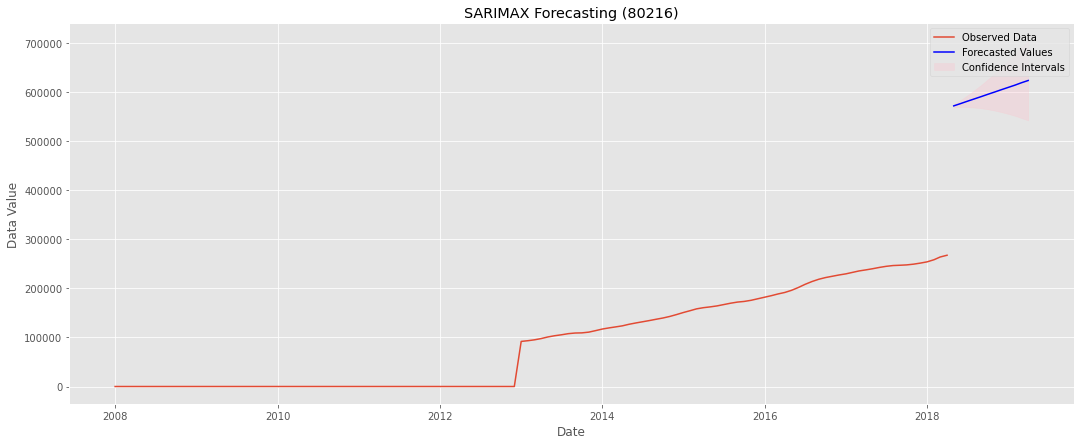

In [136]:
# Get the forecast and confidence intervals
forecast = results.get_forecast(steps=forecast_periods)
forecast_ci = forecast.conf_int()

# Extract forecasted values, lower, and upper confidence intervals
forecast_values = forecast.predicted_mean
lower_ci = forecast_ci.iloc[:, 0]
upper_ci = forecast_ci.iloc[:, 1]

# Plotting
plt.figure(figsize=(18, 7))

# Plot observed data
plt.plot(data.index, data[80216], label='Observed Data')

# Plot forecasted values
plt.plot(forecast_values.index, forecast_values, color='blue', label='Forecasted Values')

# Fill confidence intervals
plt.fill_between(forecast_values.index, lower_ci, upper_ci, color='pink', alpha=0.3, label='Confidence Intervals')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.title('SARIMAX Forecasting (80216)')
plt.legend()
plt.show()


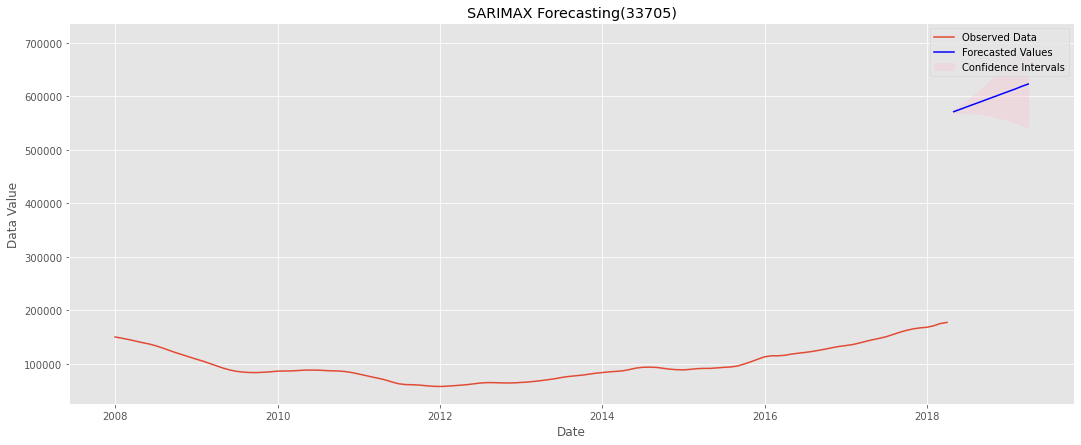

In [137]:
# The steps we've done apply to this too

forecast = results.get_forecast(steps=forecast_periods)
forecast_ci = forecast.conf_int()

forecast_values = forecast.predicted_mean
lower_ci = forecast_ci.iloc[:, 0]
upper_ci = forecast_ci.iloc[:, 1]

plt.figure(figsize=(18, 7))
plt.plot(data.index, data[33705], label='Observed Data')
plt.plot(forecast_values.index, forecast_values, color='blue', label='Forecasted Values')
plt.fill_between(forecast_values.index, lower_ci, upper_ci, color='pink', alpha=0.3, label='Confidence Intervals')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.title('SARIMAX Forecasting(33705)')
plt.legend()
plt.show()

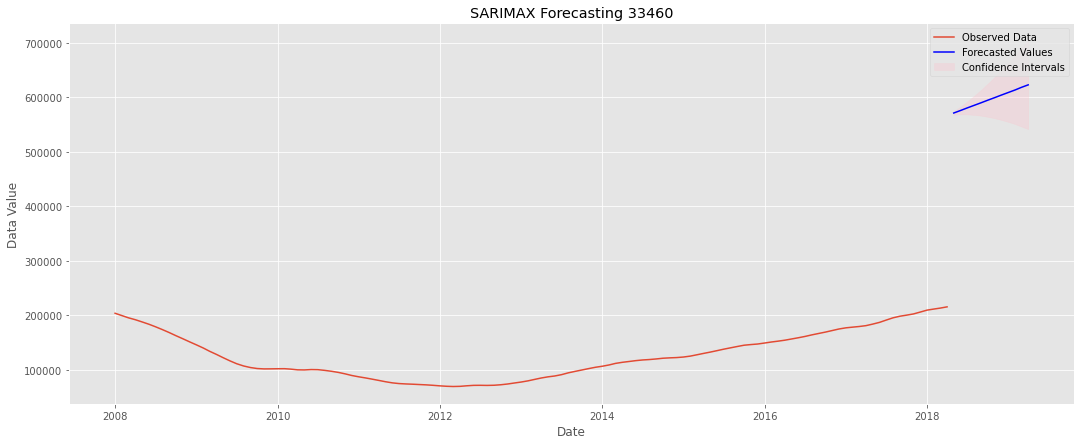

In [138]:
# Similar steps for forecasting apply to this zip code
forecast = results.get_forecast(steps=forecast_periods)
forecast_ci = forecast.conf_int()

forecast_values = forecast.predicted_mean
lower_ci = forecast_ci.iloc[:, 0]
upper_ci = forecast_ci.iloc[:, 1]

plt.figure(figsize=(18, 7))
plt.plot(data.index, data[33460], label='Observed Data')
plt.plot(forecast_values.index, forecast_values, color='blue', label='Forecasted Values')
plt.fill_between(forecast_values.index, lower_ci, upper_ci, color='pink', alpha=0.3, label='Confidence Intervals')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.title('SARIMAX Forecasting 33460')
plt.legend()
plt.show()

# CONCLUSION

The study used the top 5 ZipCodes from a 5 year period with the highest Return of Investement for Real estate.The data at tghe end indincated  a positve trend in the real estate market, no seasonality was observed.

The top 5 zipcodes chosen have shown to be still the best Zipcodes to invest in the area the ZipCodes are : 94590, 94601,33705,33460 with 94601 with the steadiest growth and 33705 with the best predicted ROI.

Best ZipCodes with their Counties:
* 94601 (Solano, Carlifonia)
* 94590 (Alameda, Carlifonia)
* 80216 (Denver, Colorado)
* 33705 (Pinellas, Florida)
* 33460 (Palm Beach, Florida)

# RECOMMENDATIONS

1. Monitor Market Trends: Continuously monitor market trends and real estate indicators in the selected zip codes to stay informed about any changes or shifts in the market dynamics. This will help in making timely adjustments to investment strategies.

2. Consider Local Factors: Take into account local factors such as economic conditions, job growth, population demographics, and development projects in each zip code to assess the long-term sustainability of the real estate market in those areas.

Next Steps:

1. Implementation of Predictive Model: Integrate the predictive time series model into investment strategies, using it as a valuable tool for making informed decisions and optimizing portfolio performance.

2. Detailed Due Diligence: Conduct a comprehensive due diligence process, including property inspections, market analysis, and local economic factors, to further refine investment decisions and mitigate risks.

3. Diversification Strategies: Explore diversification strategies within the recommended zip codes and counties, spreading investments across different property types and neighborhoods to enhance portfolio resilience.

4. Continuous Monitoring: Stay abreast of market trends, economic indicators, and any emerging patterns to adapt investment strategies accordingly. Regularly update the predictive model with new data for improved forecasting accuracy.

By following these recommendations and next steps, investors can position themselves strategically in the real estate market, capitalize on identified opportunities, and navigate the dynamic landscape with confidence.

In [738]:
import joblib
# Save the model using joblib
with open('sarimax_model.pkl', 'rb') as f:
    loaded_model = joblib.load(f)